Importing the libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

In [147]:
data = pd.read_csv('Cleaned_Data.csv')


In [148]:
data.shape

(437, 25)

In [149]:
data['Release date'] = pd.to_datetime(data['Release date'])

In [150]:
# columns fit for effective eda
df = data[['Title', 'Production company', 'Release date', 'Running time',
       'Country', 'Language', 'Box office','Budget', 'Metascore', 'imdbRating','Rotten_Tomatoes(in %)', 'Genre',
       'Rated', 'Type']]

Showcase Different Distributions

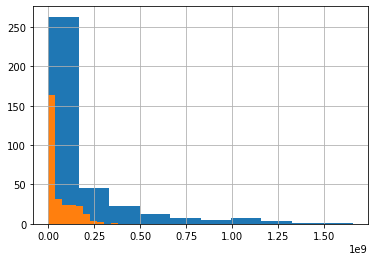

In [151]:
df['Box office'].hist();
df['Budget'].hist();

<Figure size 432x288 with 0 Axes>

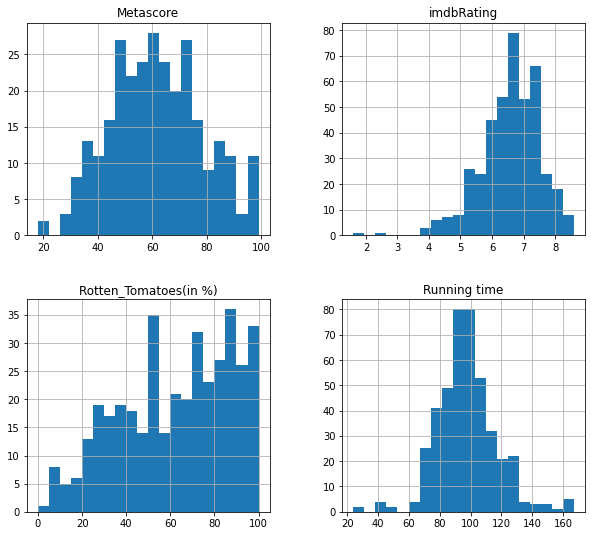

In [152]:
plt.figure()
df[[ 'Metascore', 'imdbRating','Rotten_Tomatoes(in %)','Running time']].hist(figsize=(10,9),bins=20);

<AxesSubplot:xlabel='Budget', ylabel='Box office'>

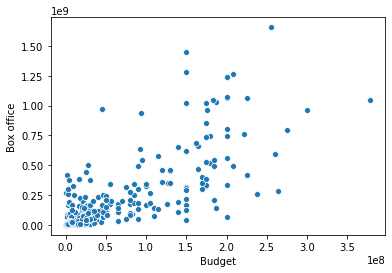

In [153]:
sns.scatterplot(x = 'Budget',y= 'Box office',data=df)

In [154]:
df[(df['Rated']!='Not Rated') & (df['Rated']!='Unrated')].groupby('Rated')[['imdbRating'
                                                                             ,'Metascore',
                                                                             'Rotten_Tomatoes(in %)',
                                                                             'Running time',
                                                                             'Budget',
                                                                             'Box office']].mean()

imdbRating  Metascore  Rotten_Tomatoes(in %)  Running time  \
Rated                                                                  
Approved    6.734146  73.400000              67.368421     90.675000   
G           6.639645  66.347458              66.639241     90.730539   
PG          6.381928  57.542857              57.703226    102.801205   
PG-13       6.714286  50.571429              41.500000    127.214286   
Passed      6.483333  60.000000              55.600000     80.000000   
R           7.433333  74.666667              84.000000     94.666667   
TV-14       5.500000  84.000000                    NaN     85.000000   
TV-G        7.300000        NaN             100.000000     83.000000   
TV-PG       7.300000        NaN                    NaN    107.000000   

                Budget    Box office  
Rated                                 
Approved  2.780909e+06  1.874565e+07  
G         5.500468e+07  1.717871e+08  
PG        7.035883e+07  2.017915e+08  
PG-13     1.486571e+08  3.938747e+08  
Passed    1.425000e+06  2.047000e+06  
R         1.600000e+07  1.540000e+07  
TV-14              NaN           NaN  
TV-G               NaN           NaN  
TV-PG              NaN           NaN

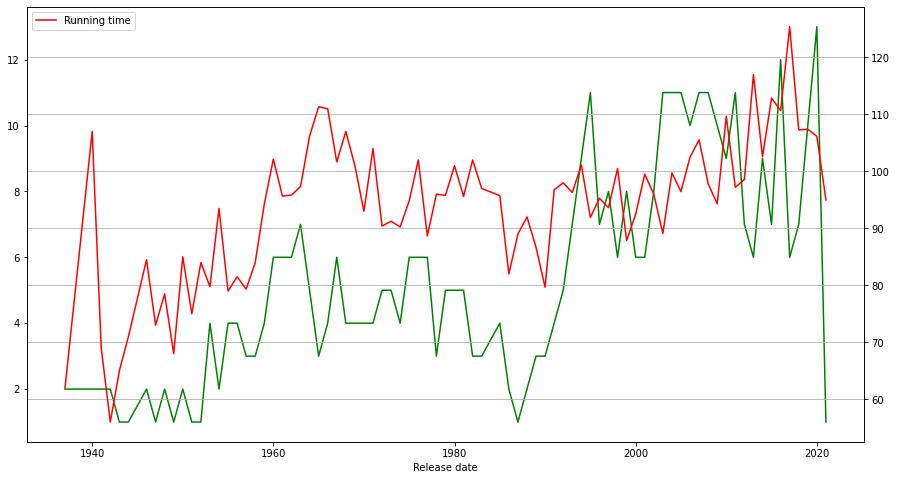

In [155]:
_,ax = plt.subplots(figsize=(15,8))
ax1 = ax.twinx()
df.groupby(df['Release date'].dt.year).agg({'Title':"count"}).plot(ax=ax,c='g',legend='Title')
df.groupby(df['Release date'].dt.year).agg({'Running time':np.mean}).plot(ax=ax1,c='r')

# ax.set_xticklabels(df['Release date'].dt.year,rotation='vertical')
# plt.yticks(np.arange(1,14,1))
plt.grid()
# increase in disney movies since early 90's


In [156]:
df.columns

Index(['Title', 'Production company', 'Release date', 'Running time',
       'Country', 'Language', 'Box office', 'Budget', 'Metascore',
       'imdbRating', 'Rotten_Tomatoes(in %)', 'Genre', 'Rated', 'Type'],
      dtype='object')

In [157]:
import ast
from collections import Counter
countries = Counter()
for ele in df.Country.dropna():
    t = ast.literal_eval(ele)
    countries.update(t)

    
Languages = Counter()
for ele in df.Language.dropna():
    t = ast.literal_eval(ele)
    Languages.update(t)
    
genre = Counter()
for ele in df.Genre.dropna():
    t = ele.replace(" ","").split(',')
    genre.update(t)
    
top_5_rated = df.Rated.value_counts()[:5]

In [160]:
pd.Series(genre).sort_values(ascending=False)

Family         354
Adventure      231
Comedy         217
Fantasy        146
Drama          127
Animation      113
Romance         61
Musical         59
Action          54
Sci-Fi          46
Documentary     33
Sport           32
Western         30
Mystery         22
Biography       20
Music           20
Crime           17
History         16
Thriller        15
War              9
Short            6
Horror           5
News             1
dtype: int64

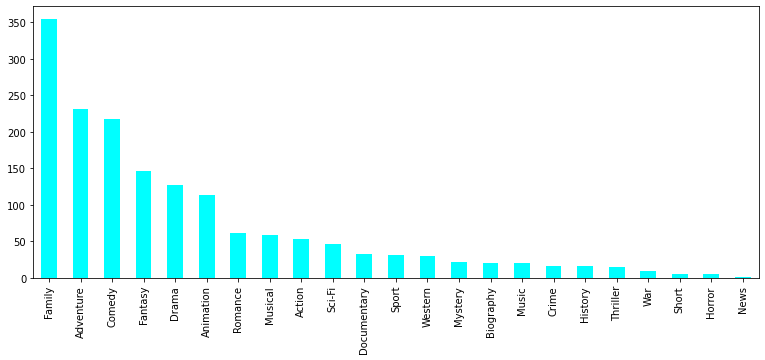

In [166]:
pd.Series(genre).sort_values(ascending=False).plot(kind='bar',figsize=(13,5),color='cyan')
plt.savefig("Genre.jpg",bbox_inches='tight');

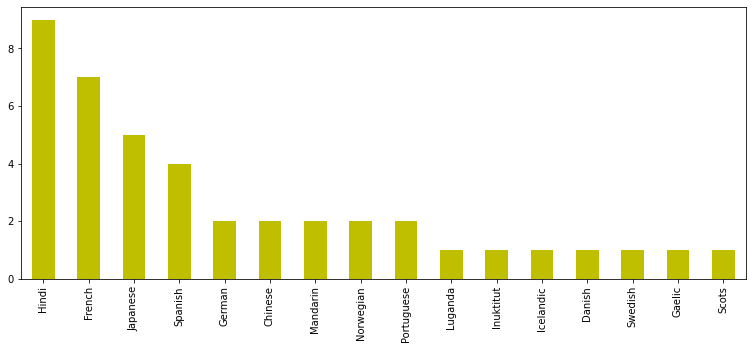

In [167]:
# except English
pd.Series(Languages)[1:].sort_values(ascending=False).plot(kind='bar',figsize=(13,5),color='y')
plt.savefig("Language.jpg",bbox_inches='tight');

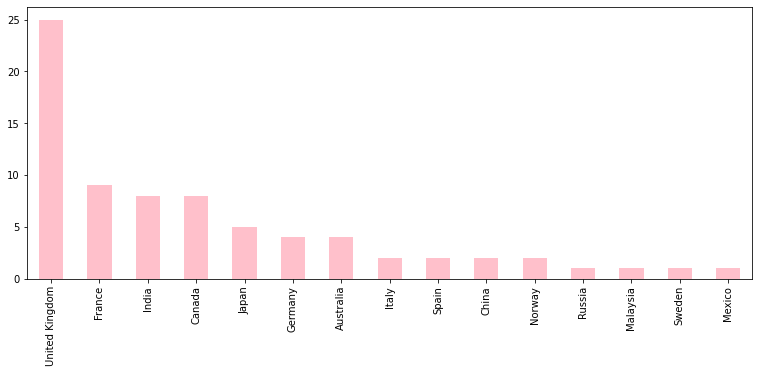

In [168]:
# except United States
pd.Series(countries)[1:].sort_values(ascending=False).plot(kind='bar',figsize=(13,5),color='pink');
plt.savefig("Countries.jpg",bbox_inches='tight');

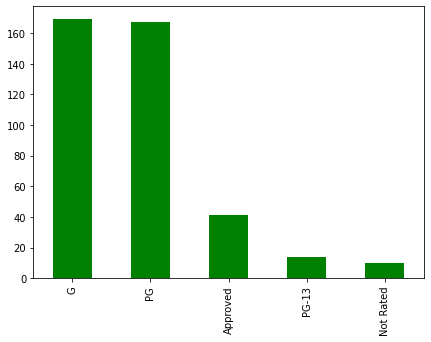

In [16]:
top_5_rated.plot(kind='bar',figsize=(7,5),color='g');

In [17]:
for col in ['Box office','Budget','Metascore','imdbRating','Rotten_Tomatoes(in %)','Running time']:
    print("The movie with maximum {} is".format(col))
    print(df.iloc[df[col].idxmax()])
    print('*'*100,end='\n\n')

The movie with maximum Box office is
Title                                                       The Lion King
Production company       'Walt Disney Pictures', 'Fairview Entertainment'
Release date                                          2019-07-09 00:00:00
Running time                                                          118
Country                                                 ['United States']
Language                                                      ['English']
Box office                                                      1.657e+09
Budget                                                           2.55e+08
Metascore                                                              88
imdbRating                                                            8.5
Rotten_Tomatoes(in %)                                                  93
Genre                        Animation, Adventure, Drama, Family, Musical
Rated                                                                   G
T

In [18]:
for col in ['Box office','Budget','Metascore','imdbRating','Rotten_Tomatoes(in %)','Running time']:
    print("The movie with minimum {} is".format(col))
    print(df.iloc[df[col].idxmin()])
    print('*'*100,end='\n\n')

The movie with minimum Box office is
Title                    The Boys: The Sherman Brothers' Story
Production company        'Walt Disney PicturesRed Hour Films'
Release date                               2009-04-24 00:00:00
Running time                                               101
Country                                      ['United States']
Language                                           ['English']
Box office                                               55513
Budget                                                     NaN
Metascore                                                  NaN
imdbRating                                                 NaN
Rotten_Tomatoes(in %)                                      NaN
Genre                                                      NaN
Rated                                                      NaN
Type                                                       NaN
Name: 344, dtype: object
********************************************************

ROI = BOX-OFFICE collection / BUDGET

In [19]:
df['ROI'] = df['Box office'] / df['Budget']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
print("The movie with best ROI is")
print(df.iloc[df.ROI.idxmax()])
print('*'*100)
print("The movie with worst ROI is")
print(df.iloc[df.ROI.idxmin()])
print('*'*100)


The movie with best ROI is
Title                                        Bambi
Production company       'Walt Disney Productions'
Release date                   1942-08-09 00:00:00
Running time                                    70
Country                          ['United States']
Language                               ['English']
Box office                               2.674e+08
Budget                                      858000
Metascore                                       91
imdbRating                                     7.3
Rotten_Tomatoes(in %)                           90
Genre                     Animation, Drama, Family
Rated                                            G
Type                                         movie
ROI                                        311.655
Name: 6, dtype: object
****************************************************************************************************
The movie with worst ROI is
Title                                                   

Statisical Analysis

In [64]:
import statsmodels.stats.api as sm
import statsmodels.api as sa
import pylab
import math

Running Time


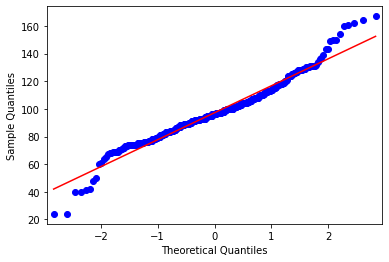

With 95% Confidence we can say that Mean running time(in minutes) of movies lies between 95.37 and 99.07


In [132]:
a = df['Running time'].dropna().values.astype(list)
sa.qqplot(data=a,line='s')
pylab.show()
lb,ub = sm.DescrStatsW(data=a).tconfint_mean()
print("With 95% Confidence we can say that Mean running time(in minutes) of movies lies between {} and {}".format(round(lb,2),round(ub,2)))       

Metascore

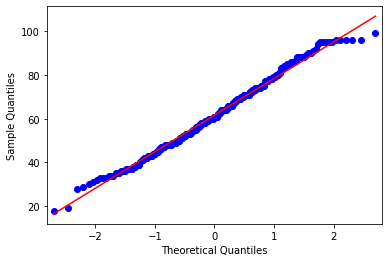

With 95% Confidence we can say that mean Metascore of movies lies between 59.71 and 63.59


In [133]:
a = df['Metascore'].dropna().values.astype(list)
sa.qqplot(data=a,line='s')
pylab.show()
lb,ub = sm.DescrStatsW(data=a).tconfint_mean()
print("With 95% Confidence we can say that mean Metascore of movies lies between {} and {}".format(round(lb,2),round(ub,2)))       

Imdb Rating


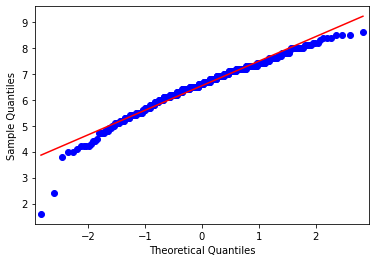

With 95% Confidence we can say that mean IMDB ratings of movies lies between 6.45 and 6.63


In [134]:
a = df['imdbRating'].dropna().values.astype(list)
sa.qqplot(data=a,line='s')
pylab.show()
lb,ub = sm.DescrStatsW(data=a).tconfint_mean()
print("With 95% Confidence we can say that mean IMDB ratings of movies lies between {} and {}".format(round(lb,2),round(ub,2)))       

Box Office

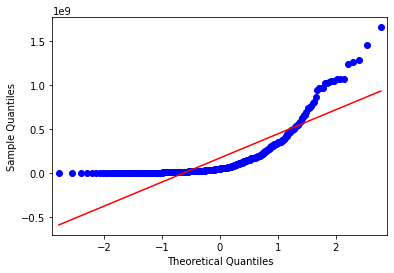

(141660069.78038082, 197789805.5146598)

In [95]:
a = df['Box office'].dropna().values.astype(list)
sa.qqplot(data=a,line='s')
pylab.show()


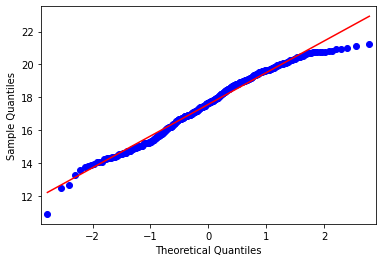

In [137]:
# after log transformation
a = np.log(df['Box office']).dropna().values.astype(list)
sa.qqplot(data=a,line='s')
pylab.show()
lb,ub = sm.DescrStatsW(data=a).tconfint_mean()
lb = math.exp(lb)
ub = math.exp(ub)

In [138]:
print("With 95% Confidence we can say that mean Box-Office collection of movies lies between ${} and ${}".format(round(lb,2),round(ub,2)))       

With 95% Confidence we can say that mean Box-Office collection of movies lies between $35365508.65 and $52457970.78


Budget

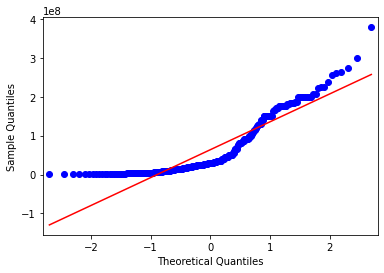

In [139]:
a = df['Budget'].dropna().values.astype(list)
sa.qqplot(data=a,line='s')
pylab.show()

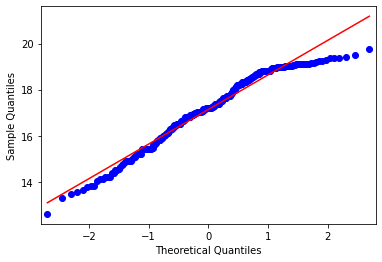

In [141]:
# after log transformation
a = np.log(df['Budget']).dropna().values.astype(list)
sa.qqplot(data=a,line='s')
pylab.show()
lb,ub = sm.DescrStatsW(data=a).tconfint_mean()
lb = math.exp(lb)
ub = math.exp(ub)

In [142]:
print("With 95% Confidence we can say that mean Budget of movies lies between ${} and ${}".format(round(lb,2),round(ub,2)))       

With 95% Confidence we can say that mean Budget of movies lies between $23314400.75 and $33116824.61
